In [1]:
import numpy as np
from wremnants import theory_corrections, theory_tools
from utilities import boostHistHelpers as hh
from utilities import common, logging
from utilities.io_tools import input_tools, output_tools
import hist
import argparse
import os
import h5py
import narf
import pdb
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


Input file created with `python scripts/histmakers/w_z_gen_dists.py --filterProcs Zmumu_powheg-weak-low Zmumu_powheg-weak-peak Zmumu_powheg-weak-high -p powheg-weak3`

In [94]:
res, meta, _ = input_tools.read_infile('../w_z_gen_dists_powheg-weak3.hdf5')

In [6]:
res.keys()

dict_keys(['Zmumu_powheg-weak-high', 'Zmumu_powheg-weak-low', 'Zmumu_powheg-weak-peak', 'meta_info'])

In [7]:
out = res['Zmumu_powheg-weak-peak']['output']
out.keys()

dict_keys(['lhe_massVptV', 'lhe_absYVptV', 'lhe_absYVmassV', 'lhe_massVcosTheta', 'lhe_massVcosTheta_weakWeightZ', 'lhe', 'lhe_angular', 'lhe_helicity', 'lhe_weak_helicity', 'lhe_weak_angular'])

In [12]:
out['lhe_massVcosTheta'].get()

Hist(
  Variable(array([  0.        ,  46.        ,  50.        ,  60.        ,
        70.        ,  80.        ,  84.10914612,  85.95089962,
        87.10540236,  87.89053048,  88.45805684,  88.88825587,
        89.22706656,  89.50247586,  89.7324266 ,  89.92892431,
        90.10030248,  90.25253723,  90.39004432,  90.5161815 ,
        90.63357651,  90.74434893,  90.85026593,  90.9528565 ,
        91.0535    ,  91.1535    ,  91.2535    ,  91.3541435 ,
        91.45673407,  91.56265107,  91.67342349,  91.7908185 ,
        91.91695568,  92.05446277,  92.20669752,  92.37807569,
        92.5745734 ,  92.80452414,  93.07993344,  93.41874413,
        93.84894316,  94.41646952,  95.20159764,  96.35610038,
       100.        , 110.        , 120.        , 140.        ,
       160.        , 200.        ]), underflow=False, name='massVlhe'),
  Regular(50, -1, 1, name='cosThetaStarlhe'),
  storage=Weight()) # Sum: WeightedSum(value=7.912e+08, variance=7.912e+08)

In [14]:
out['lhe_massVcosTheta_weakWeightZ'].get()

Hist(
  Variable(array([  0.        ,  46.        ,  50.        ,  60.        ,
        70.        ,  80.        ,  84.10914612,  85.95089962,
        87.10540236,  87.89053048,  88.45805684,  88.88825587,
        89.22706656,  89.50247586,  89.7324266 ,  89.92892431,
        90.10030248,  90.25253723,  90.39004432,  90.5161815 ,
        90.63357651,  90.74434893,  90.85026593,  90.9528565 ,
        91.0535    ,  91.1535    ,  91.2535    ,  91.3541435 ,
        91.45673407,  91.56265107,  91.67342349,  91.7908185 ,
        91.91695568,  92.05446277,  92.20669752,  92.37807569,
        92.5745734 ,  92.80452414,  93.07993344,  93.41874413,
        93.84894316,  94.41646952,  95.20159764,  96.35610038,
       100.        , 110.        , 120.        , 140.        ,
       160.        , 200.        ]), underflow=False, name='massVlhe'),
  Regular(50, -1, 1, name='cosThetaStarlhe'),
  StrCategory(['weak_no_ew', 'weak_no_ho', 'weak_default', 'weak_ps', 'weak_mt_dn', 'weak_mt_up', 'weak_mz_dn

[ 70.          80.          84.10914612  85.95089962  87.10540236
  87.89053048  88.45805684  88.88825587  89.22706656  89.50247586
  89.7324266   89.92892431  90.10030248  90.25253723  90.39004432
  90.5161815   90.63357651  90.74434893  90.85026593  90.9528565
  91.0535      91.1535      91.2535      91.3541435   91.45673407
  91.56265107  91.67342349  91.7908185   91.91695568  92.05446277
  92.20669752  92.37807569  92.5745734   92.80452414  93.07993344
  93.41874413  93.84894316  94.41646952  95.20159764  96.35610038
 100.        ]


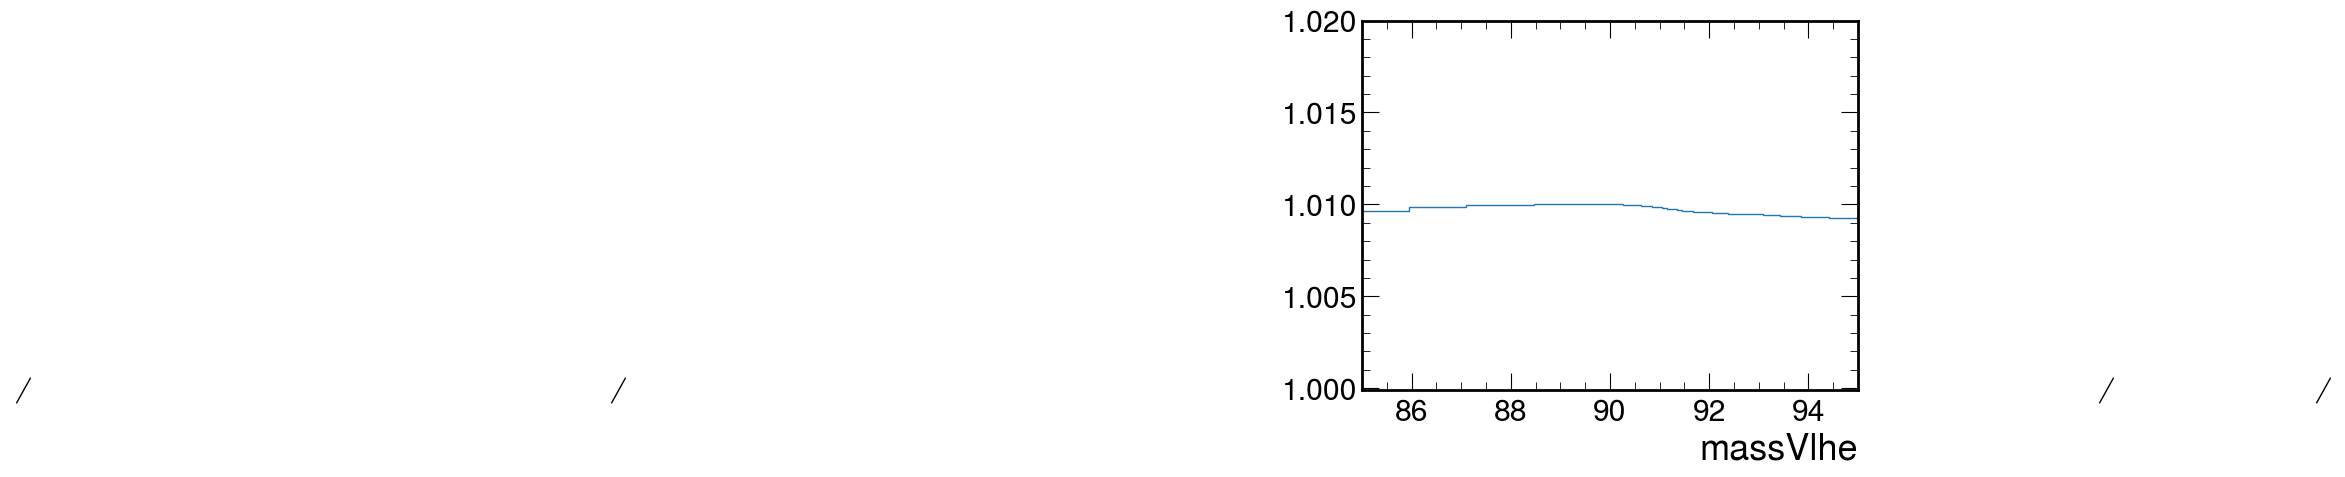

In [39]:
fig = plt.figure(figsize=(6.4, 4.8))
name = 'lhe_massVcosTheta_weakWeightZ'
axis = 'massVlhe'
binning = out['lhe_massVcosTheta_weakWeightZ'].get().axes['massVlhe'].edges[4:-5]
print(binning)
def getHist(sample, name, axis, binning, weight):
    hproj = hh.rebinHist(res[sample]['output'][name].get()[:,:,weight].project(axis), axis, binning)
    widths = hproj.axes.widths.flatten()
    hproj /= widths[0]
    return hproj

hvar = getHist('Zmumu_powheg-weak-peak', name, axis, binning, 2) # EW HO
hnom = getHist('Zmumu_powheg-weak-peak', name, axis, binning, 0) # LO

hratio = hh.divideHists(hvar, hnom)
p = hratio.plot()
p[0].errorbar.remove()

plt.ylim(0.9999,1.02)
plt.xlim(85,95)

val_ho = hratio.values()

In [40]:
def getEWratio(var, nom):
    hvar = getHist('Zmumu_powheg-weak-peak', name, axis, binning, var)
    hnom = getHist('Zmumu_powheg-weak-peak', name, axis, binning, nom)
    hratio = hh.divideHists(hvar, hnom)
    return hratio.values()

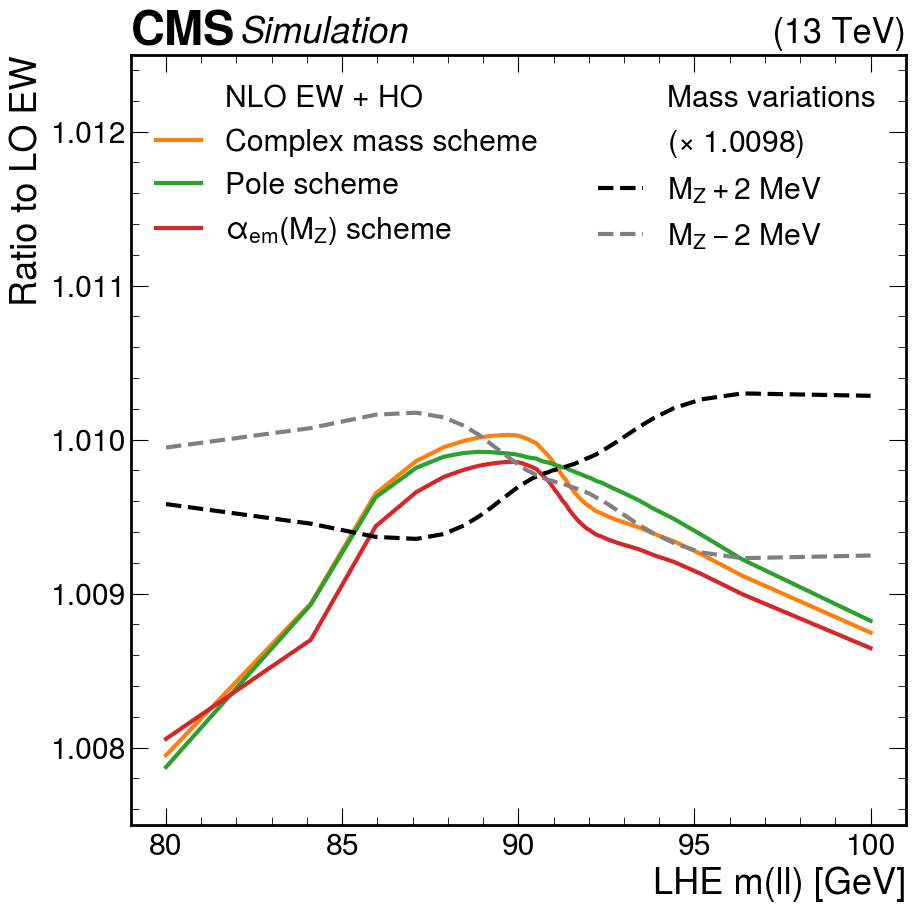

In [91]:
import mplhep as hep  # HEP (CMS) extensions/styling on top of mpl
hep.style.use("CMS")
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 5

# EW order variations
plt.plot([], [], ' ', label="NLO EW + HO")
plt.plot(binning[1:], getEWratio(2, 0), '-', label = 'Complex mass scheme')
plt.plot(binning[1:], getEWratio(3, 0), label = 'Pole scheme')
plt.plot(binning[1:], getEWratio(10, 0), label = r'$\alpha_{em}(M_Z)$ scheme')
# Mass variations
mass_offset = 1.01
mass_offset = getEWratio(2, 0)[np.where(binning == 91.1535)][0]
plt.plot([], [], ' ', label=fr"Mass variations")
plt.plot([], [], ' ', label=fr"($\times$ {mass_offset:0.4f})")
plt.plot(binning[1:], getEWratio(7, 2)*mass_offset, label = fr'$M_Z+2$ MeV', linestyle='dashed', c='black')
plt.plot(binning[1:], getEWratio(6, 2)*mass_offset, label = fr'$M_Z-2$ MeV', linestyle='dashed', c='gray')
# to add back offset to legend: $\times$ {mass_offset:0.4f}
plt.legend(ncol=2)
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel("Ratio to LO EW")
plt.ylim(1.0075,1.0125)
hep.cms.label("", loc=0, ax=plt.gca())
plt.savefig('z_ew_mass.pdf', bbox_inches='tight')
plt.show()

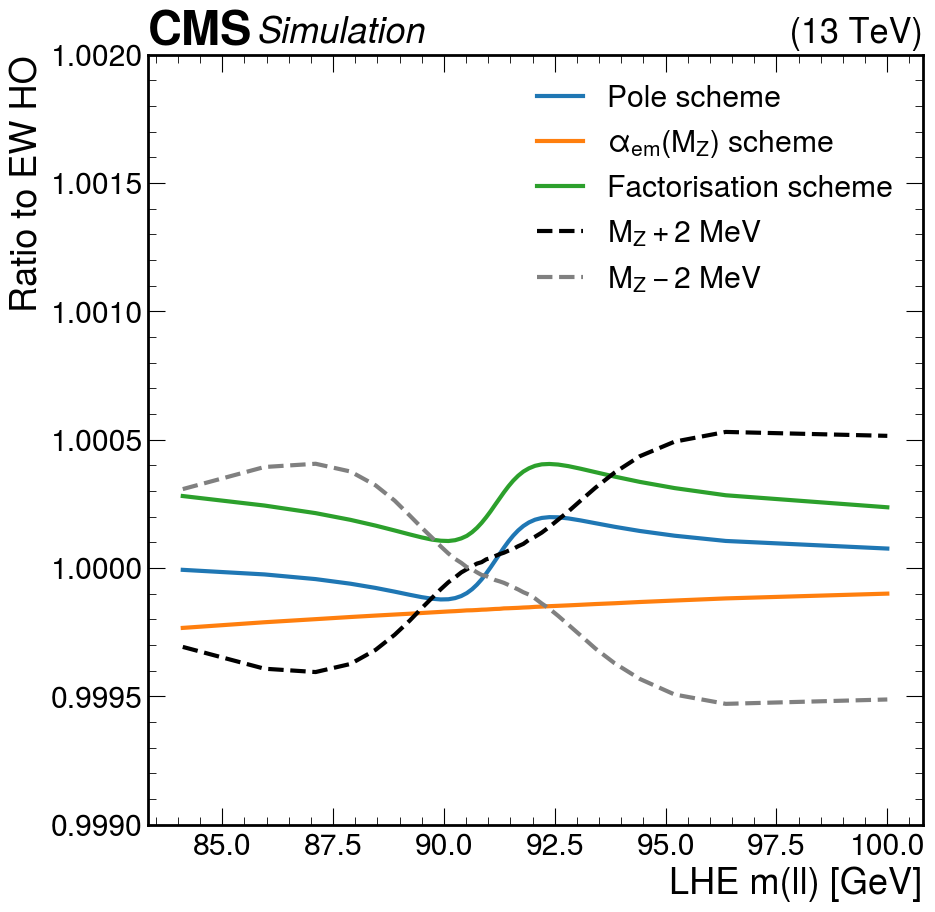

In [37]:
# EW scheme variations
#plt.plot(binning[1:], getEWratio(2, 0), label = 'EW HO / LO')
#plt.plot(binning[1:], getEWratio(1, 2), label = 'EW / EW HO')
plt.plot(binning[1:], getEWratio(3, 2), label = 'Pole scheme')
plt.plot(binning[1:], getEWratio(10, 2), label = r'$\alpha_{em}(M_Z)$ scheme')
plt.plot(binning[1:], getEWratio(11, 2), label = 'Factorisation scheme')
plt.plot(binning[1:], getEWratio(7, 2), label = '$M_Z+2$ MeV', linestyle='dashed', c='black')
plt.plot(binning[1:], getEWratio(6, 2), label = '$M_Z-2$ MeV', linestyle='dashed', c='gray')
plt.legend()
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel("Ratio to EW HO")
plt.ylim(0.999,1.002)
hep.cms.label("", loc=0, ax=plt.gca())
plt.show()

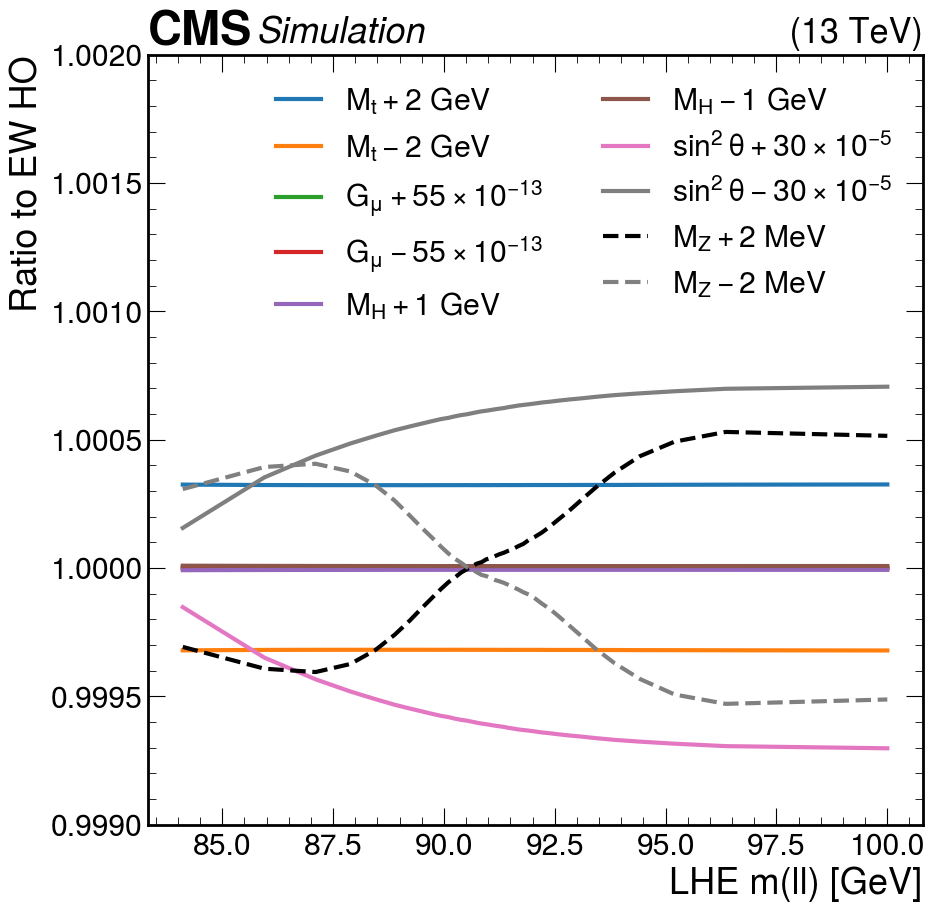

In [23]:
# EW parameter variations
plt.plot(binning[1:], getEWratio(5, 2), label = '$M_t+2$ GeV')
plt.plot(binning[1:], getEWratio(4, 2), label = '$M_t-2$ GeV')
plt.plot(binning[1:], getEWratio(9, 2), label = r'$G_\mu+55 \times 10^{-13}$')
plt.plot(binning[1:], getEWratio(8, 2), label = r'$G_\mu-55 \times 10^{-13}$')
plt.plot(binning[1:], getEWratio(13, 2), label = '$M_H+1$ GeV')
plt.plot(binning[1:], getEWratio(12, 2), label = '$M_H-1$ GeV')
plt.plot(binning[1:], getEWratio(17, 2), label = r'$\sin^2 \theta + 30 \times 10^{-5}$')
plt.plot(binning[1:], getEWratio(14, 2), label = r'$\sin^2 \theta - 30 \times 10^{-5}$')
plt.plot(binning[1:], getEWratio(7, 2), label = '$M_Z+2$ MeV', linestyle='dashed', c='black')
plt.plot(binning[1:], getEWratio(6, 2), label = '$M_Z-2$ MeV', linestyle='dashed', c='gray')
plt.legend(ncols=2)
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel("Ratio to EW HO")
plt.ylim(0.999,1.002)
hep.cms.label("", loc=0, ax=plt.gca())
plt.show()

In [13]:
import ROOT

def make_ew_binning(mass = 91.1535, width = 2.4932, initialStep = 0.1, bin_edges_low=[], bin_edges_high=[]):
    maxVal = ROOT.Math.breitwigner_pdf(mass, width, mass)
    bins = [mass]
    currentMass = mass
    while currentMass - mass < 100:
        binSize = maxVal / ROOT.Math.breitwigner_pdf(currentMass, width, mass) * initialStep
        currentMass += binSize
        bins.append(currentMass)
        lowMass = 2*mass - currentMass
        if lowMass - binSize > 0:
            bins.insert(0, lowMass)
    bins.insert(0, 0.)

    if bin_edges_low:
        bins = bin_edges_low + [b for b in bins if b > bin_edges_low[-1]][1:]
    if bin_edges_high:
        bins = [b for b in bins if b < bin_edges_high[0]][:-1] + bin_edges_high

    return bins

In [28]:
csaxis = 'cosThetaStarlhe'
csbinning = out['lhe_massVcosTheta_weakWeightZ'].get().axes['cosThetaStarlhe'].edges
def getCSratio(var, nom, scale=1.):
    hvar = getHist('Zmumu_powheg-weak-peak', name, csaxis, csbinning, var)
    hnom = getHist('Zmumu_powheg-weak-peak', name, csaxis, csbinning, nom)
    hratio = hh.divideHists(hvar, hnom)
    ratio = hratio.values()
    ratio = (ratio - 1) * scale + 1
    return ratio

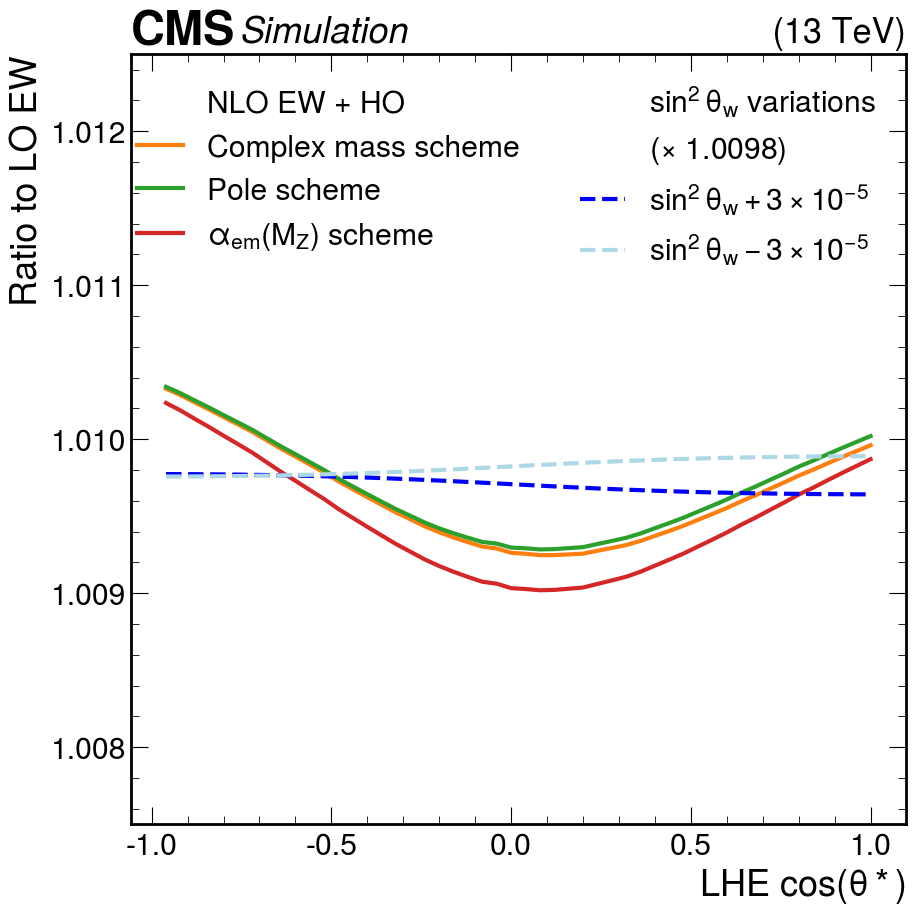

In [93]:
# EW order variations
plt.plot([], [], ' ', label="NLO EW + HO")
plt.plot(csbinning[1:], getCSratio(2, 0), '-', label = 'Complex mass scheme')
plt.plot(csbinning[1:], getCSratio(3, 0), label = 'Pole scheme')
plt.plot(csbinning[1:], getCSratio(10, 0), label = r'$\alpha_{em}(M_Z)$ scheme')
# Mass variations
mass_offset = 1.01
mass_offset = getEWratio(2, 0)[np.where(binning == 91.1535)][0]
plt.plot([], [], ' ', label=r"$\sin^2 \theta_{w}$ variations")
plt.plot([], [], ' ', label=fr"($\times$ {mass_offset:0.4f})")
plt.plot(csbinning[1:], getCSratio(17, 2, scale=0.1)*mass_offset, label = r'$\sin^2 \theta_{w} + 3 \times 10^{-5}$', linestyle='dashed', c='blue')
plt.plot(csbinning[1:], getCSratio(14, 2, scale=0.1)*mass_offset, label = r'$\sin^2 \theta_{w} - 3 \times 10^{-5}$', linestyle='dashed', c='lightblue')
plt.legend(ncol=2)
plt.xlabel(r"LHE $cos(\theta*)$")
plt.ylabel("Ratio to LO EW")
plt.ylim(1.0075,1.0125)
hep.cms.label("", loc=0, ax=plt.gca())
plt.savefig('z_ew_cosTheta.pdf', bbox_inches='tight')
plt.show()

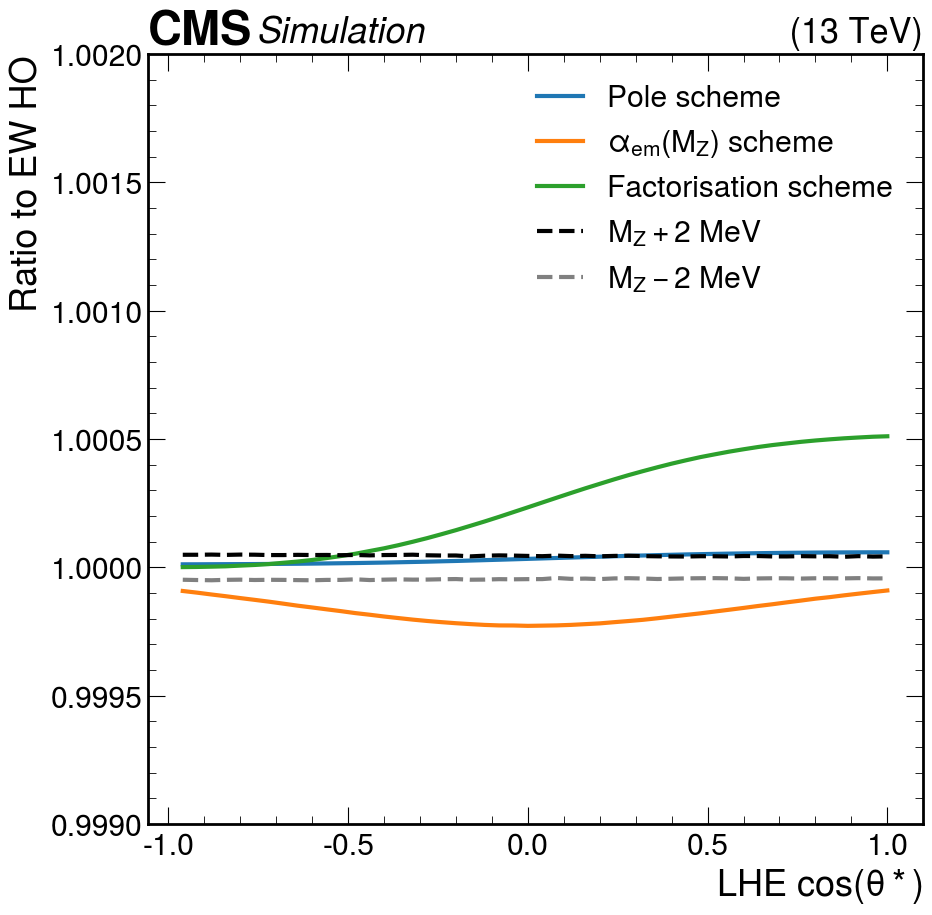

In [74]:
# EW scheme variations
plt.plot(csbinning[1:], getCSratio(3, 2), label = 'Pole scheme')
plt.plot(csbinning[1:], getCSratio(10, 2), label = r'$\alpha_{em}(M_Z)$ scheme')
plt.plot(csbinning[1:], getCSratio(11, 2), label = 'Factorisation scheme')
plt.plot(csbinning[1:], getCSratio(7, 2), label = '$M_Z+2$ MeV', linestyle='dashed', c='black')
plt.plot(csbinning[1:], getCSratio(6, 2), label = '$M_Z-2$ MeV', linestyle='dashed', c='gray')
plt.legend()
plt.xlabel(r"LHE $cos(\theta*)$")
plt.ylabel("Ratio to EW HO")
plt.ylim(0.999,1.002)
hep.cms.label("", loc=0, ax=plt.gca())
plt.show()

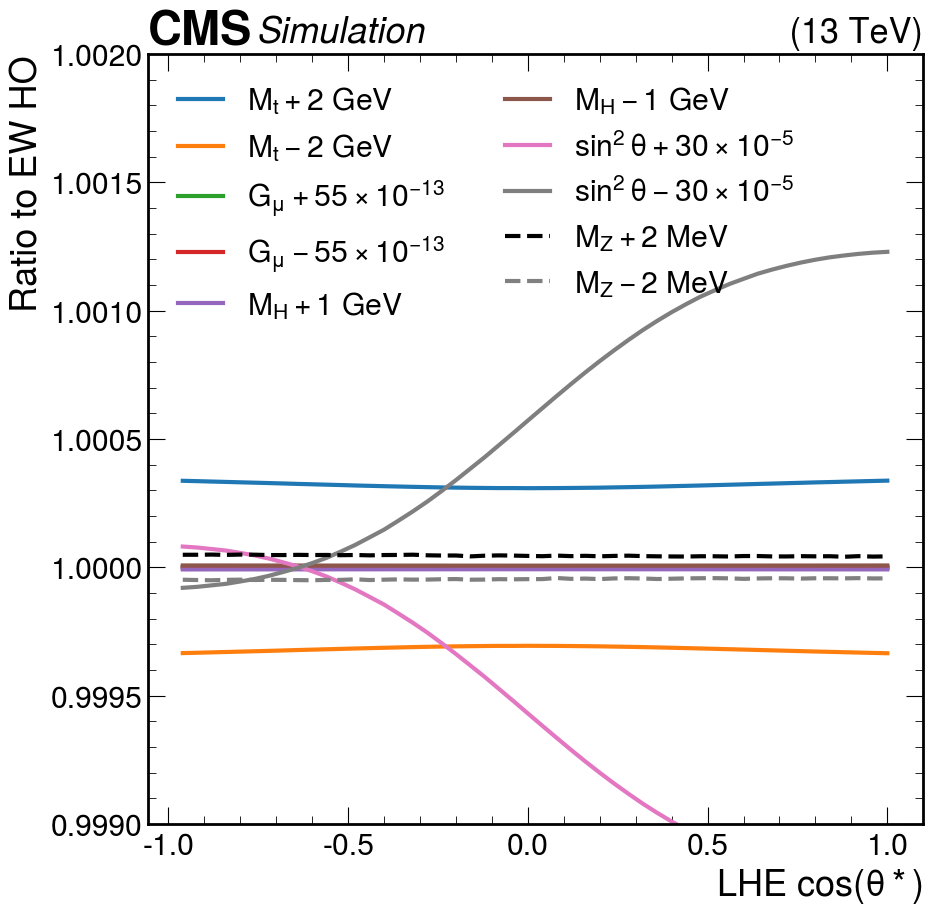

In [31]:
# EW parameter variations
plt.plot(csbinning[1:], getCSratio(5, 2), label = '$M_t+2$ GeV')
plt.plot(csbinning[1:], getCSratio(4, 2), label = '$M_t-2$ GeV')
plt.plot(csbinning[1:], getCSratio(9, 2), label = r'$G_\mu+55 \times 10^{-13}$')
plt.plot(csbinning[1:], getCSratio(8, 2), label = r'$G_\mu-55 \times 10^{-13}$')
plt.plot(csbinning[1:], getCSratio(13, 2), label = '$M_H+1$ GeV')
plt.plot(csbinning[1:], getCSratio(12, 2), label = '$M_H-1$ GeV')
plt.plot(csbinning[1:], getCSratio(17, 2, scale=1), label = r'$\sin^2 \theta + 30 \times 10^{-5}$')
plt.plot(csbinning[1:], getCSratio(14, 2, scale=1), label = r'$\sin^2 \theta - 30 \times 10^{-5}$')
plt.plot(csbinning[1:], getCSratio(7, 2), label = '$M_Z+2$ MeV', linestyle='dashed', c='black')
plt.plot(csbinning[1:], getCSratio(6, 2), label = '$M_Z-2$ MeV', linestyle='dashed', c='gray')
plt.legend(ncols=2)
plt.xlabel(r"LHE $cos(\theta*)$")
plt.ylabel("Ratio to EW HO")
plt.ylim(0.999,1.002)
hep.cms.label("", loc=0, ax=plt.gca())
plt.show()

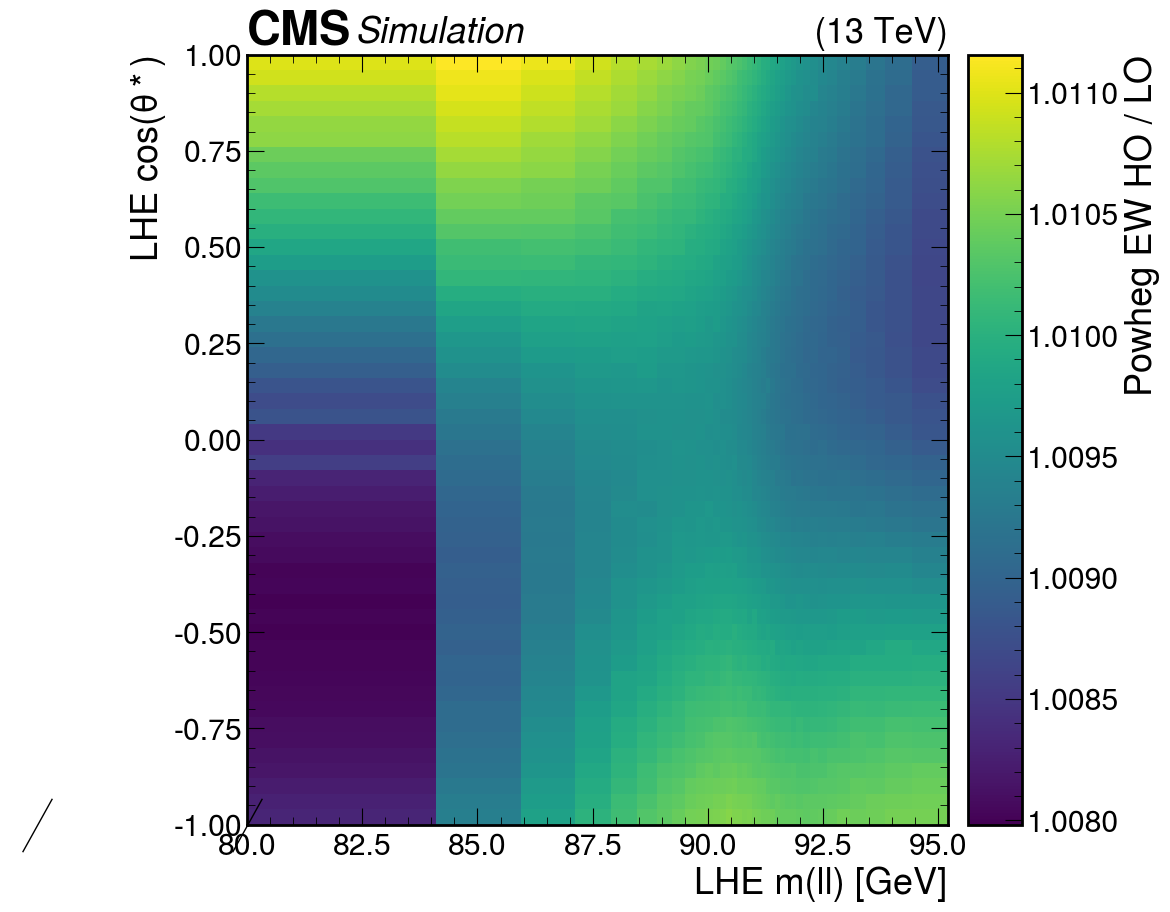

In [33]:
import matplotlib as mpl
h2lo = res['Zmumu_powheg-weak-peak']['output']['lhe_massVcosTheta_weakWeightZ'].get()[5:42,:,0]
h2ho = res['Zmumu_powheg-weak-peak']['output']['lhe_massVcosTheta_weakWeightZ'].get()[5:42,:,2]
h2ratio = hh.divideHists(h2ho, h2lo, flow=False)
ratio = h2ratio.plot().pcolormesh
#ratio.set_norm(mpl.colors.Normalize(vmin=1., vmax=1.01))
#ratio.set_cmap(mpl.colormaps['RdBu'])
#plt.xlim(80,100)
hep.cms.label("", loc=0, ax=plt.gca())
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel(r"LHE $cos(\theta*)$")

# Assume colorbar was plotted last one plotted last
cb = plt.gca().collections[-1].colorbar
cb.set_label('Powheg EW HO / LO', loc='top')

plt.show()

In [62]:
res['Zmumu_powheg-weak-peak']['output']['lhe_massVcosTheta_weakWeightZ'].get()[3:42,:,0]

Hist(
  Variable(array([ 80.        ,  84.10914612,  85.95089962,  87.10540236,
        87.89053048,  88.45805684,  88.88825587,  89.22706656,
        89.50247586,  89.7324266 ,  89.92892431,  90.10030248,
        90.25253723,  90.39004432,  90.5161815 ,  90.63357651,
        90.74434893,  90.85026593,  90.9528565 ,  91.0535    ,
        91.1535    ,  91.2535    ,  91.3541435 ,  91.45673407,
        91.56265107,  91.67342349,  91.7908185 ,  91.91695568,
        92.05446277,  92.20669752,  92.37807569,  92.5745734 ,
        92.80452414,  93.07993344,  93.41874413,  93.84894316,
        94.41646952,  95.20159764,  96.35610038, 100.        ]), underflow=False, name='massVlhe'),
  Regular(50, -1, 1, name='lheCosTheta'),
  storage=Double()) # Sum: 1779393026961.671 (1779393057829.6677 with flow)

In [63]:
hsum = hh.sumHists([
    res['Zmumu_powheg-weak-low']['output']['lhe_massVcosTheta_weakWeightZ'].get(),
    res['Zmumu_powheg-weak-peak']['output']['lhe_massVcosTheta_weakWeightZ'].get(),
    res['Zmumu_powheg-weak-high']['output']['lhe_massVcosTheta_weakWeightZ'].get()
])

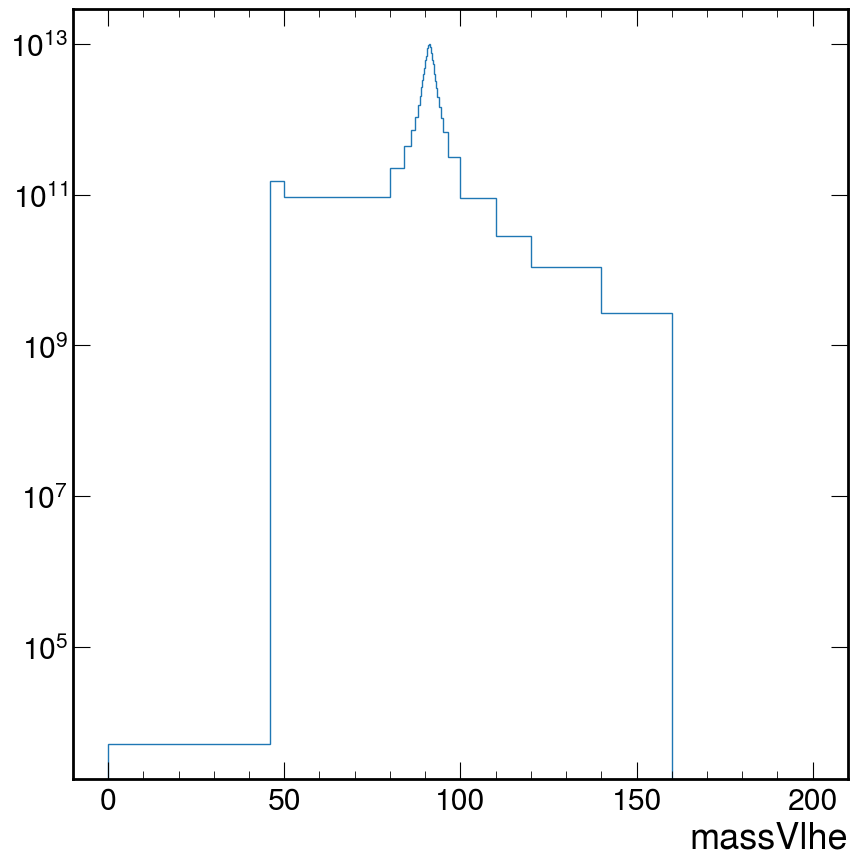

In [71]:
hsum_mll = hsum.project('massVlhe')
widths = hsum_mll.axes.widths.flatten()
hsum_mll /= widths[0]
hsum_mll.plot()
plt.gca().set_yscale('log')

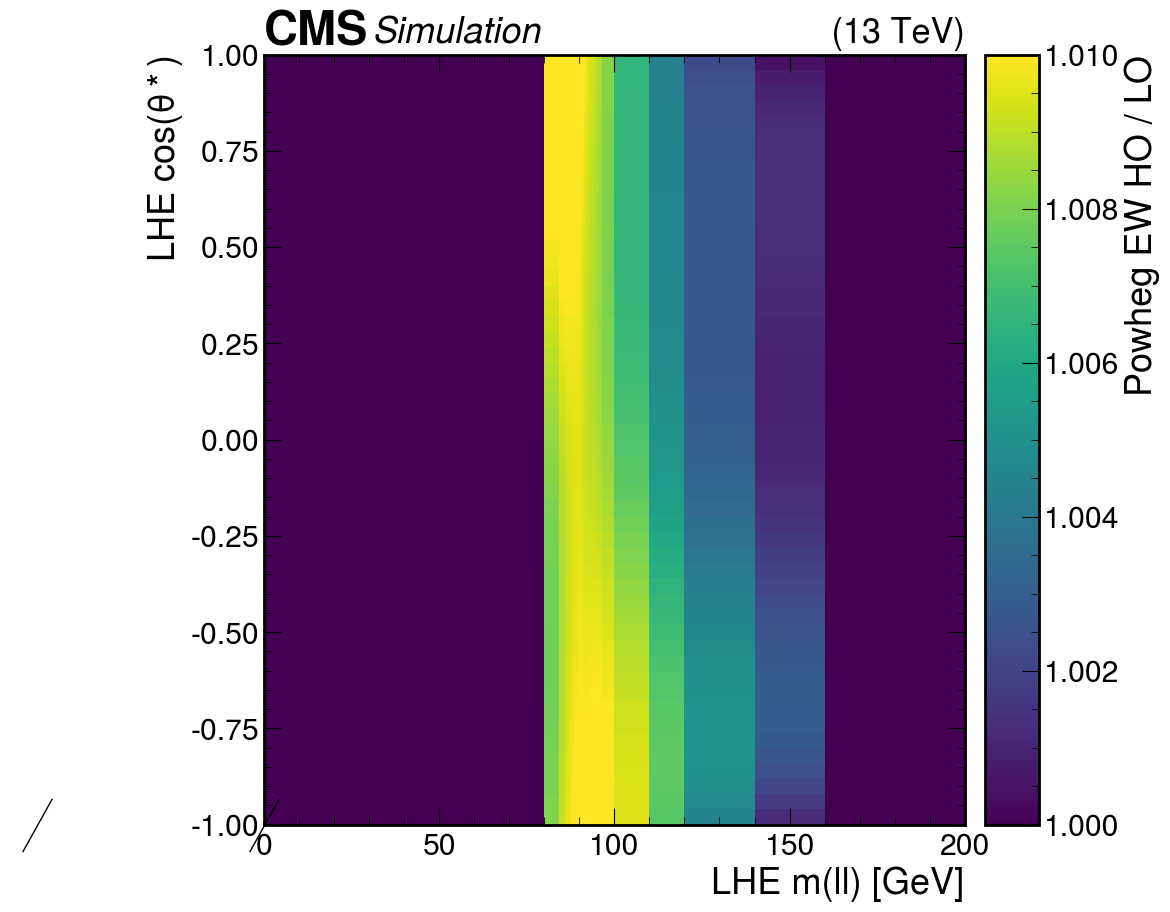

In [66]:

hslo = hsum[:,:,0]
hsho = hsum[:,:,2]
hsratio = hh.divideHists(hsho, hslo, flow=False)
sratio = hsratio.plot().pcolormesh
sratio.set_norm(mpl.colors.Normalize(vmin=1., vmax=1.01))
#ratio.set_cmap(mpl.colormaps['RdBu'])
#plt.xlim(80,100)
hep.cms.label("", loc=0, ax=plt.gca())
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel(r"LHE $cos(\theta*)$")

# Assume colorbar was plotted last one plotted last
cb = plt.gca().collections[-1].colorbar
cb.set_label('Powheg EW HO / LO', loc='top')

plt.show()